In [2548]:
from pathlib import Path
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely as sp
import random
import cv2
import math
import numpy as np
import pandas as pd

Get Bounds of Initial Dataset

In [2782]:
data_folder = Path("data/roadimages")
no_roads_folder = "1 _ No Roads"

file_paths = [file_path for file_path in data_folder.rglob("*") if file_path.is_file() and no_roads_folder not in file_path.parts]

file_names = [file_path.stem for file_path in data_folder.rglob("*") if file_path.is_file() and no_roads_folder not in file_path.parts]

file_parts = [file_name.split("_") for file_name in file_names]

sorted_file_parts = sorted(file_parts, key=lambda x: float(x[-1]))

min_lon = float(sorted_file_parts[0][-1])
max_lon = float(sorted_file_parts[-1][-1])
sorted_file_parts

sorted_file_parts = sorted(file_parts, key=lambda x: float(x[-2]))
min_lat = float(sorted_file_parts[0][-2])
max_lat = float(sorted_file_parts[-1][-2])
#sorted_file_parts


print("Minimum latitude:", min_lat)
print("Maximum latitude:", max_lat)

print("Minimum longitude:", min_lon)
print("Maximum longitude:", max_lon)

Minimum latitude: 14.501167
Maximum latitude: 14.69918
Minimum longitude: 120.963593
Maximum longitude: 121.105042


In [2783]:
shape = gpd.read_file("data/shapefiles/gis_osm_roads_free_1.shp")
dataset_area = gpd.read_file("data/shapefiles/dataset_area.shp")

dataset_area

,geometry
0,"POLYGON ((120.93428 14.47773, 121.1335 14.4739..."


In [2784]:
dataset_roads = shape[dataset_area['geometry'].item().contains(shape['geometry'])]

dataset_roads.count()

osm_id      142331
code        142331
fclass      142331
name         59119
ref           5241
oneway      142331
maxspeed    142331
layer       142331
bridge      142331
tunnel      142331
geometry    142331
dtype: int64

In [2785]:
dataset_roads.head()

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
0,267,5152,cycleway,Maharlika Street,None,B,25,0,F,F,"LINESTRING (121.05212 14.6503, 121.05223 14.65..."
2,2667097,5113,primary,Taft Avenue,170,F,60,0,F,F,"LINESTRING (120.99671 14.55627, 120.9967 14.55..."
3,2667099,5113,primary,Lerma Street,170,F,50,0,F,F,"LINESTRING (120.98539 14.6046, 120.98545 14.60..."
4,2667105,5122,residential,E. Manaloto Street,None,B,0,0,F,F,"LINESTRING (120.9938 14.54125, 120.99497 14.54..."
5,2667111,5113,primary,Quezon Boulevard,170,F,60,0,F,F,"LINESTRING (120.98018 14.59292, 120.98002 14.5..."


<Axes: >

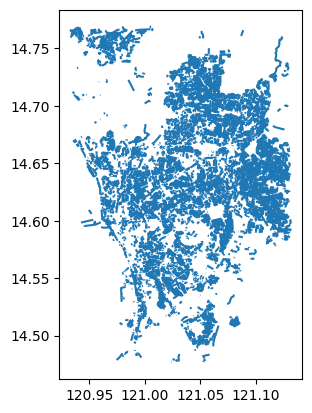

In [2786]:
dataset_roads[:10000].plot()

In [2787]:
dataset_roads['fclass'].unique()

array(['cycleway', 'primary', 'residential', 'secondary', 'tertiary',
       'motorway', 'trunk', 'primary_link', 'trunk_link', 'service',
       'unclassified', 'footway', 'steps', 'pedestrian', 'secondary_link',
       'motorway_link', 'tertiary_link', 'track', 'path', 'busway',
       'track_grade4', 'living_street', 'bridleway', 'track_grade5',
       'track_grade1'], dtype=object)

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
711,4483587,5122,residential,Zodiac Street,None,B,0,0,F,F,"LINESTRING (121.03515 14.55605, 121.03552 14.5..."
1370,4940456,5122,residential,Recoletos Street,None,B,0,0,F,F,"LINESTRING (121.03432 14.55529, 121.03434 14.5..."
5901,14712757,5113,primary,Kalayaan Overpass,191,F,60,1,T,F,"LINESTRING (121.03568 14.55571, 121.03538 14.5..."
7659,22882909,5115,tertiary,Jupiter Street,None,B,30,0,F,F,"LINESTRING (121.03501 14.55593, 121.03494 14.5..."
23798,28535210,5115,tertiary,Zodiac Street,None,B,30,0,F,F,"LINESTRING (121.03501 14.55593, 121.03485 14.5..."
23859,28538743,5112,trunk,EDSA,1,F,60,0,F,F,"LINESTRING (121.03549 14.55549, 121.03522 14.5..."
23975,28574025,5132,trunk_link,None,None,F,0,1,T,F,"LINESTRING (121.03487 14.55522, 121.03495 14.5..."
29108,29213181,5112,trunk,EDSA,1,F,60,0,F,F,"LINESTRING (121.03508 14.55511, 121.0349 14.55..."
29110,29213301,5113,primary,Kalayaan Overpass,191,F,60,1,T,F,"LINESTRING (121.03447 14.55542, 121.03459 14.5..."
173565,146300437,5113,primary,Senator Gil J. Puyat Avenue,190,F,40,0,F,F,"LINESTRING (121.03507 14.55532, 121.03501 14.5..."


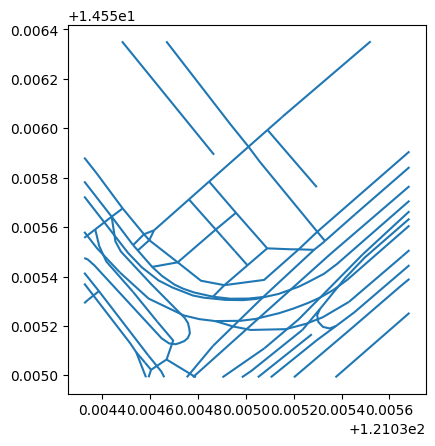

In [2788]:
centerx, centery = (121.035004, 14.555672)

offset = 0.00068
minx, miny, maxx, maxy = (centerx - offset, centery - offset, centerx + offset, centery + offset)
bbox = sp.geometry.box(minx, miny, maxx, maxy)

road_patch = dataset_roads.cx[minx:maxx, miny:maxy]
road_patch.loc[:, 'geometry'] = road_patch['geometry'].apply(lambda geom: geom.intersection(bbox))
road_patch = road_patch[~road_patch.is_empty]

road_patch.plot()

road_patch

data\roadmasks\241__14.655340_121.035004.png
Random patch path: data\roadimages\4 _ Wide Roads\241__14.655340_121.035004.png


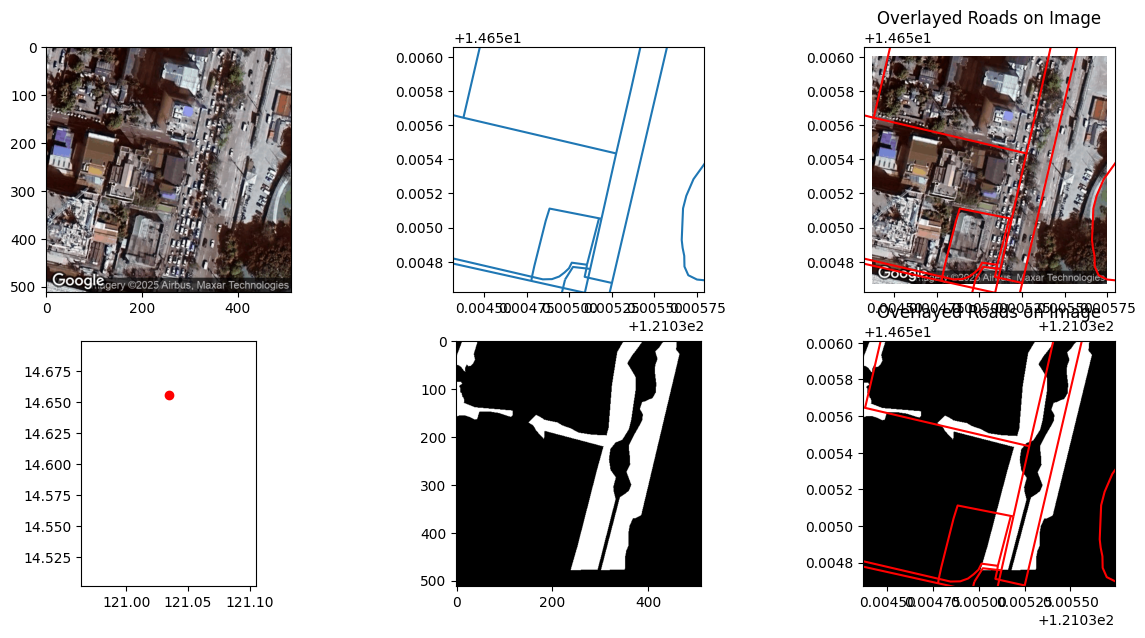

In [2890]:
#get file paths
#data\roadimages\3 _ Clear Regular Roads\57__14.557001_121.006165.png
DISPLAY_ALLOWANCE = 0.00005
random_patch_path = random.choice(file_paths)
folder_names = ["\\1 _ No Roads", "\\2 _ Roads with Occlusions", "\\3 _ Clear Regular Roads", "\\4 _ Wide Roads"]
mask_path = str(random_patch_path).replace("roadimages", "roadmasks")

#remove folder names from mask paths
for folder_name in folder_names:
    mask_path = mask_path.replace(folder_name, "")
print(mask_path)

#set patch size
lat_size = 0.0013364/2
long_size = 0.00137216/2
#right = increase lon offset; up = increase lat offset
lat_shift = 0.0000
lon_shift = -0.000053
random_patch_lat = float(random_patch_path.stem.split("_")[-2])
random_patch_lon = float(random_patch_path.stem.split("_")[-1])

#adjust linestring coordinates 
minx, miny, maxx, maxy = (random_patch_lon - long_size, random_patch_lat - lat_size, random_patch_lon + long_size, random_patch_lat + lat_size)
minx = minx - lon_shift
maxx = maxx - lon_shift
miny = miny - lat_shift
maxy = maxy - lat_shift
bbox = sp.geometry.box(minx, miny, maxx, maxy)

#remove roads outside of patch
random_patch_roads = dataset_roads.cx[minx:maxx, miny:maxy]

print("Random patch path:", random_patch_path)

image = cv2.imread(str(random_patch_path))
mask_image = cv2.imread(str(mask_path))

if random_patch_roads.empty:
    print("No roads found in the random patch.")
    plt.imshow(image)
else:
    fig, axes = plt.subplots(2, 3, figsize=(15, 7))
    axes[0][0].imshow(image)

    random_patch_roads.plot(ax=axes[0][1])

    axes[0][1].set_xlim(minx-DISPLAY_ALLOWANCE, maxx+DISPLAY_ALLOWANCE)
    axes[0][1].set_ylim(miny-DISPLAY_ALLOWANCE, maxy+DISPLAY_ALLOWANCE)
    axes[0][1].set_aspect('equal')

    axes[0][2].imshow(image, extent=[minx, maxx, miny, maxy])
    random_patch_roads.plot(ax=axes[0][2], color='red')
    axes[0][2].set_title("Overlayed Roads on Image")
    axes[0][2].set_xlim(minx-DISPLAY_ALLOWANCE, maxx+DISPLAY_ALLOWANCE)
    axes[0][2].set_ylim(miny-DISPLAY_ALLOWANCE, maxy+DISPLAY_ALLOWANCE)
    axes[0][2].set_aspect('equal')

    axes[1][0].scatter(random_patch_lon, random_patch_lat, color='red')
    axes[1][0].set_xlim(min_lon, max_lon)
    axes[1][0].set_ylim(min_lat, max_lat)
    axes[1][0].set_aspect('equal')
    
    axes[1][1].imshow(mask_image)

    axes[1][2].imshow(mask_image, extent=[minx, maxx, miny, maxy])
    random_patch_roads.plot(ax=axes[1][2], color='red')
    axes[1][2].set_title("Overlayed Roads on Image")
    axes[1][2].set_xlim(minx, maxx)
    axes[1][2].set_ylim(miny, maxy)
    axes[1][2].set_aspect('equal')

    plt.show()


In [2891]:
PATCH_SIZE = 512 # Size of the patches
EARTH_CIRCUFERENCE = 40075016.686 # in meters
SEARCH_INTERVAL = 50  # Distance between interpolated points
SEARCH_RANGE = 10 # pixels the road can be adjusted to find the best fit [coords-SEARCH_RANGE, coords+SEARCH_RANGE]
LINE_LENGTH = 20  # Total length of perpendicular lines
MAX_DISTANCE_FROM_ROAD = 50 # Maximum distance a point can be from a road mask
MAX_ROAD_WIDTH = 150 # Maximum width of a road for it to be considered

<Axes: >

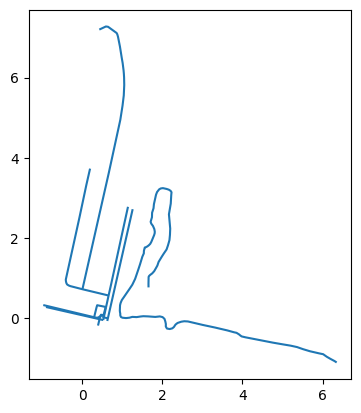

In [2892]:
#create scaled version of cropped linemap to fit mask
# Calculate scaling factors
# Function to scale geometries
def scale_geometry(geom, x_scale, y_scale):
    return sp.affinity.scale(geom, xfact=x_scale, yfact=y_scale, origin=(0,0))

def shift_geometry(geom, x_shift, y_shift):
    return sp.affinity.translate(geom, xoff=-x_shift, yoff=-y_shift)

# Create a copy of the GeoDataFrame and apply scaling to the copy
scaled_patch_roads = random_patch_roads.copy()
scaled_patch_roads["geometry"] = scaled_patch_roads["geometry"].apply(
    lambda geom: shift_geometry(geom, minx, miny)
)
scaled_patch_roads["geometry"] = scaled_patch_roads["geometry"].apply(
    lambda geom: scale_geometry(geom, 1/(maxx-minx), 1/(maxy-miny))
)
scaled_patch_roads.plot()

In [2893]:
roads_for_mask = scaled_patch_roads.copy()
roads_for_mask["geometry"] = roads_for_mask["geometry"].apply(
    lambda geom: scale_geometry(geom, 512, 512)
)

In [2894]:
def get_binary_mask_from_image(image):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, image_mask = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    return np.flipud(image_mask)

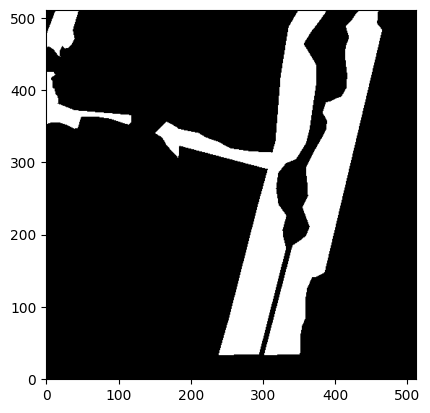

In [2895]:
image_mask = get_binary_mask_from_image(mask_image)
plt.imshow(image_mask, cmap='gray')
plt.gca().invert_yaxis()

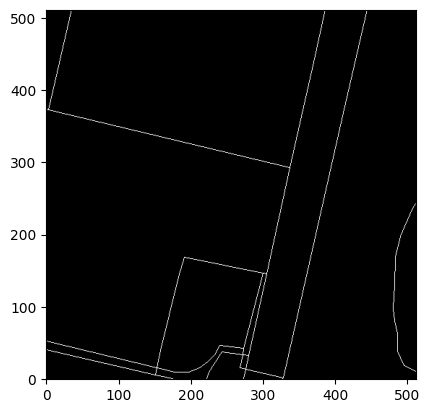

In [2896]:
def get_binary_mask_from_roads(scaled_patch_roads):
    road_mask = np.zeros((512, 512), dtype=np.uint8)
    for geom in scaled_patch_roads["geometry"]:
        if geom.is_empty:
            continue
        if isinstance(geom, sp.LineString):
            coords = np.array(geom.coords, dtype=np.int32)
            cv2.polylines(road_mask, [coords], isClosed=False, color=1, thickness=1)
    return road_mask

road_mask = get_binary_mask_from_roads(roads_for_mask)
plt.imshow(road_mask, cmap='gray')
plt.gca().invert_yaxis()


In [2897]:
def get_intersection(road_mask, image_mask):
    return np.sum((road_mask > 0) & (image_mask > 0))

In [2898]:
shifted_road_masks = [[None for _ in range(2 * SEARCH_RANGE + 1)] for _ in range(2 * SEARCH_RANGE + 1)]

for i in range(-SEARCH_RANGE, SEARCH_RANGE + 1):
    for j in range(-SEARCH_RANGE, SEARCH_RANGE + 1):
        road_copy = roads_for_mask.copy()
        road_copy["geometry"] = road_copy["geometry"].apply(
            lambda geom: shift_geometry(geom, i, j)
        )
        road_mask = get_binary_mask_from_roads(road_copy)
        shifted_road_masks[i + SEARCH_RANGE][j + SEARCH_RANGE] = road_mask

max_intersection = -1
max_i = -1
max_j = -1

# Iterate through the shifted_road_masks to find the greatest intersection
for i in range(2 * SEARCH_RANGE + 1):
    for j in range(2 * SEARCH_RANGE + 1):
        road_mask = shifted_road_masks[i][j]
        intersection = get_intersection(road_mask, image_mask)
        if intersection > max_intersection:
            max_intersection = intersection
            max_i = i
            max_j = j

best_road_mask = shifted_road_masks[max_i][max_j]

best_shift_values = (max_i - SEARCH_RANGE, max_j - SEARCH_RANGE)

print(f"Maximum intersection: {max_intersection}")
print(f"Shift coordinates: ({max_i - SEARCH_RANGE}, {max_j - SEARCH_RANGE})")

Maximum intersection: 1429
Shift coordinates: (2, -8)


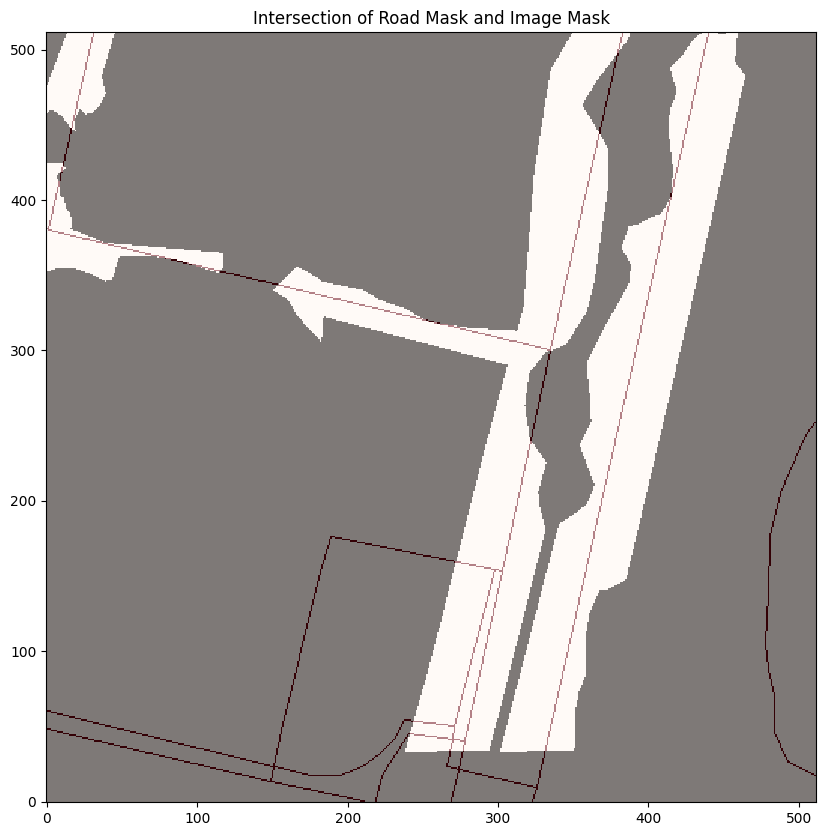

In [2899]:
plt.figure(figsize=(10, 10))
plt.imshow(image_mask, cmap='gray', interpolation='none')
plt.imshow(best_road_mask, cmap='Reds', alpha=0.5, interpolation='none')  # Overlay road_mask in red with transparency
plt.title("Intersection of Road Mask and Image Mask")
plt.gca().invert_yaxis()
plt.show()

In [2900]:
def interpolate_points(line, distance_interval):
    length = line.length
    num_points = math.ceil(length / distance_interval)
    distances = [i * distance_interval for i in range(num_points + 1)]
    points = [line.interpolate(distance) for distance in distances]
    #remove points that are out of bounds
    points = [point for point in points if point.x >= 0 and point.x < 512 and point.y >= 0 and point.y < 512]
    return points

In [2901]:
def perpendicular_line_eq(line, point):
    coords = list(line.coords)

    for i in range(len(coords) - 1):
        x1, y1 = coords[i]
        x2, y2 = coords[i + 1]
        segment = sp.LineString([(x1, y1), (x2, y2)])

        if segment.distance(point) <= 1e-7:  # Check if point is close to the segment
            # Compute original slope
            if x2 - x1 == 0:  # Vertical line
                return (0, point.y)
            elif y2 - y1 == 0:  # Horizontal line
                return (float('inf'), point.x)
            
            slope = (y2 - y1) / (x2 - x1)
            perp_slope = -1 / slope  # Perpendicular slope

            x, y = point.x, point.y
            b = y - perp_slope * x

            return (perp_slope, b)
    
    return None

In [2902]:
fitted_road_lines = roads_for_mask.copy()
fitted_road_lines["geometry"] = fitted_road_lines["geometry"].apply(
    lambda geom: shift_geometry(geom, best_shift_values[0], best_shift_values[1])
)

fitted_road_lines

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
5523,13347572,5122,residential,Road 13,None,B,0,0,F,F,"LINESTRING (1.38806 380.50644, 196.38806 1241...."
52659,44635222,5113,primary,Mindanao Avenue,128,F,60,0,F,F,"LINESTRING (583.25373 1432.05268, 580.45522 14..."
54259,47099473,5141,service,None,None,F,0,0,F,F,"LINESTRING (303.40299 153.58515, 298.02985 154..."
394667,324169535,5113,primary,North Avenue,173,F,60,0,F,F,"LINESTRING (267.02239 -12.68842, 149.85821 13...."
499775,547079677,5153,footway,None,None,B,0,0,F,F,"LINESTRING (274.44776 21.2176, 326.31343 9.37923)"
509998,558267439,5153,footway,None,None,B,0,1,T,F,"LINESTRING (223.73881 17.00329, 200.34328 -83...."
510563,558806019,5154,path,None,None,B,0,0,F,F,"LINESTRING (845.64179 403.80006, 845.08209 449..."
1162315,923720398,5113,primary,Mindanao Avenue,128,F,60,0,F,F,"LINESTRING (318.55224 -24.41185, 326.31343 9.3..."
1317922,1087544600,5153,footway,None,None,B,0,0,F,F,"LINESTRING (223.73881 17.00329, 241.08955 45.3..."
1448376,1307333239,5122,residential,Road 1,None,B,0,0,F,F,"LINESTRING (335.52985 300.31966, 1.38806 380.5..."


In [2903]:
#gets point slope pairs of a road line
def compute_points_and_perpendiculars(road_line, distance_interval):
    point_slope_pairs = []
    points = interpolate_points(road_line, distance_interval)
    for point in points:
                perp_result = perpendicular_line_eq(road_line, point)
                if perp_result is not None:
                    slope, intercept = perp_result
                    x, y = point.x, point.y
                    point_slope_pairs.append((x, y, slope))
    return point_slope_pairs
    

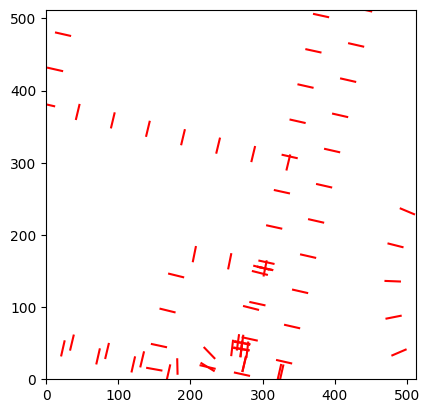

In [2904]:
bbox = sp.geometry.box(0, 0, 512, 512)
point_line_eq = []
for road in fitted_road_lines['geometry'].items():
    geom = road[1]
    
    if isinstance(geom, sp.MultiLineString):
        for line in geom.geoms:
            point_slope_pairs = compute_points_and_perpendiculars(line, SEARCH_INTERVAL)
            for point_slope_pair in point_slope_pairs:
                x, y, slope = point_slope_pair
                if slope == float('inf'):
                    x1, x2 = x, x
                    y1, y2 = y - LINE_LENGTH / 2, y + LINE_LENGTH / 2
                    plt.plot([x1, x2], [y1, y2], color='red')
                else:
                    dx = LINE_LENGTH / (2 * (1 + slope ** 2) ** 0.5)
                    dy = slope * dx
                    x1, y1 = x - dx, y - dy
                    x2, y2 = x + dx, y + dy
                    plt.plot([x1, x2], [y1, y2], color='red')
    elif isinstance(geom, sp.LineString):
        point_slope_pairs = compute_points_and_perpendiculars(geom, SEARCH_INTERVAL)
        for point_slope_pair in point_slope_pairs:
            x, y, slope = point_slope_pair
            if slope == float('inf'):
                x1, x2 = x, x
                y1, y2 = y - LINE_LENGTH / 2, y + LINE_LENGTH / 2
                plt.plot([x1, x2], [y1, y2], color='red')
            else:
                dx = LINE_LENGTH / (2 * (1 + slope ** 2) ** 0.5)
                dy = slope * dx
                x1, y1 = x - dx, y - dy
                x2, y2 = x + dx, y + dy
                plt.plot([x1, x2], [y1, y2], color='red')

plt.xlim(0, 512)
plt.ylim(0, 512)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [2905]:
import math
import matplotlib.pyplot as plt

def measure_nearest_road_to_point(point, slope, image_mask, plot=True):
    min_distance = 2
    x, y = int(point[0]), int(point[1])
    width, height = image_mask.shape  # Fix: Ensure correct order (height, width)

    # Check if the point is inside the image bounds
    if not (0 <= x < width and 0 <= y < height):
        return None  # Ensure point is within bounds

    search_mode = "inside" if image_mask[y, x] == 255 else "outside"
    points_forward = []
    points_backward = []

    if slope == float('inf'):  # **Vertical case**
        # Move upward (-y direction)
        found_white = False
        for i in range(y - 1, -1, -1):
            if search_mode == "inside" and (image_mask[i, x] == 0 or i == 0 or i == height - 1):
                points_backward.append((x, i))
                break
            if search_mode == "outside":
                if image_mask[i, x] == 255 and not found_white:
                    points_backward.append((x, i))
                    found_white = True
                    continue
                if found_white and image_mask[i, x] == 0:
                    points_backward.append((x, i))
                    break

        # Move downward (+y direction)
        found_white = False
        for i in range(y + 1, height):
            if search_mode == "inside" and (image_mask[i, x] == 0 or i == 0 or i == height - 1):
                points_forward.append((x, i))
                break
            if search_mode == "outside":
                if image_mask[i, x] == 255 and not found_white:
                    points_forward.append((x, i))
                    found_white = True
                    continue
                if found_white and image_mask[i, x] == 0:
                    points_forward.append((x, i))
                    break

    else:  # **Non-vertical case (diagonal/horizontal)**
        step_size = 1 / max(abs(slope), 1)  # Normalize step size
        dx = step_size if slope >= 0 else -step_size
        dy = slope * dx

        # Move forward
        xi, yi = x + dx, y + dy
        found_white = False
        while 0 <= int(round(xi)) < width and 0 <= int(round(yi)) < height:
            if search_mode == "inside" and (image_mask[int(round(yi)), int(round(xi))] == 0 or int(round(xi)) == 0 or int(round(xi)) == width - 1 or int(round(yi)) == 0 or int(round(yi)) == height - 1):
                points_forward.append((int(round(xi)), int(round(yi))))
                break
            if search_mode == "outside":
                if image_mask[int(round(yi)), int(round(xi))] == 255 and not found_white:
                    points_forward.append((int(round(xi)), int(round(yi))))
                    found_white = True
                    xi += dx
                    yi += dy
                    continue
                if found_white and image_mask[int(round(yi)), int(round(xi))] == 0:
                    points_forward.append((int(round(xi)), int(round(yi))))
                    break
            xi += dx
            yi += dy

        # Move backward
        xi, yi = x - dx, y - dy
        found_white = False
        while 0 <= int(round(xi)) < width and 0 <= int(round(yi)) < height:
            if search_mode == "inside" and (image_mask[int(round(yi)), int(round(xi))] == 0 or int(round(xi)) == 0 or int(round(xi)) == width - 1 or int(round(yi)) == 0 or int(round(yi)) == height - 1):
                points_backward.append((int(round(xi)), int(round(yi))))
                break
            if search_mode == "outside":
                if image_mask[int(round(yi)), int(round(xi))] == 255 and not found_white:
                    points_backward.append((int(round(xi)), int(round(yi))))
                    found_white = True
                    xi -= dx
                    yi -= dy
                    continue
                if found_white and image_mask[int(round(yi)), int(round(xi))] == 0:
                    points_backward.append((int(round(xi)), int(round(yi))))
                    break
            xi -= dx
            yi -= dy

    # **Visualization**
    if plot:
        plt.imshow(image_mask, cmap='gray')
        plt.scatter(x, y, color='red', label='Start Point', edgecolors='black', marker='o')
        if points_forward:
            plt.scatter(*zip(*points_forward), color='blue', label='Forward Boundary', edgecolors='black', marker='x')
        if points_backward:
            plt.scatter(*zip(*points_backward), color='green', label='Backward Boundary', edgecolors='black', marker='s')
        plt.gca().invert_yaxis()
        plt.legend()
        plt.show()

    # **Return total measured width**
    if search_mode == "inside":
        if points_forward and points_backward:
            total_dist = math.dist(point, points_forward[0]) + math.dist(point, points_backward[0])
            if total_dist > MAX_ROAD_WIDTH:
                return None
            return total_dist
    else:
        forward_dist = math.dist(points_forward[0], points_forward[1]) if len(points_forward) > 1 else None
        backward_dist = math.dist(points_backward[0], points_backward[1]) if len(points_backward) > 1 else None
        if forward_dist is not None and forward_dist > MAX_ROAD_WIDTH:
            forward_dist = None
        if backward_dist is not None and backward_dist > MAX_ROAD_WIDTH:
            backward_dist = None

        if forward_dist is not None and backward_dist is not None:
            if math.dist(point, points_forward[0]) < math.dist(point, points_backward[0]) and math.dist(point, points_forward[0]) < MAX_DISTANCE_FROM_ROAD and forward_dist > 1.1:
                return forward_dist
            elif math.dist(point, points_backward[0]) < MAX_DISTANCE_FROM_ROAD and backward_dist > 1.1:
                return backward_dist
        elif forward_dist is not None and forward_dist > 1.1 and math.dist(point, points_forward[0]) < MAX_DISTANCE_FROM_ROAD:
            return forward_dist
        elif backward_dist is not None and backward_dist > 1.1 and math.dist(point, points_backward[0]) < MAX_DISTANCE_FROM_ROAD:
            return backward_dist

    return None

In [2906]:
#get width measurements of one road line
def measure_road_width(line,  image_mask, plot=False):
    point_slope_pairs = compute_points_and_perpendiculars(line, SEARCH_INTERVAL)
    widths = []
    for point_slope_pair in point_slope_pairs:
        x, y, slope = point_slope_pair
        width = measure_nearest_road_to_point((x, y), slope, image_mask, plot=plot)
        if width is not None:
            widths.append((point_slope_pair, width))
    return widths

C:\Users\rafae_ls0opq0\AppData\Local\Temp\ipykernel_10584\2397863572.py:98: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(*zip(*points_forward), color='blue', label='Forward Boundary', edgecolors='black', marker='x')


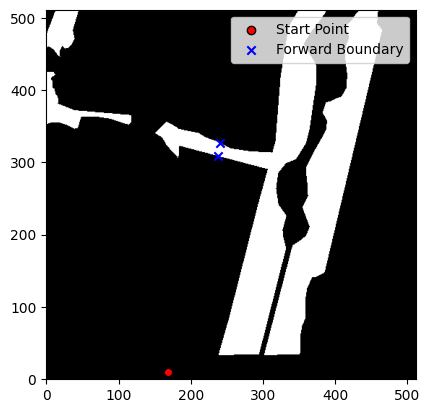

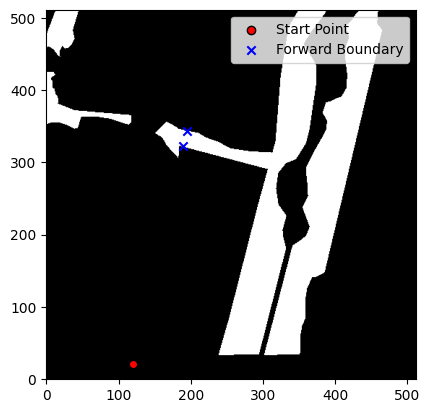

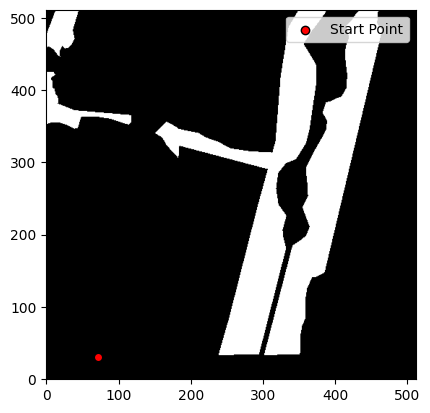

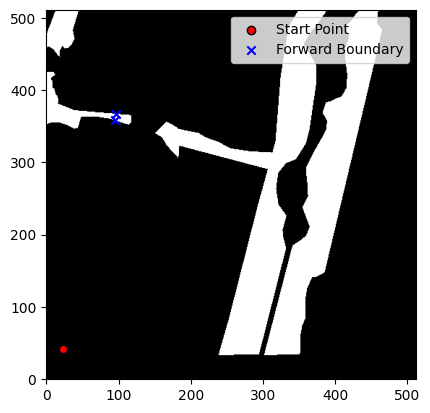

Average road width: nan pixels


d:\School Files\2024-2025\Thesis\Width Extractor\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\School Files\2024-2025\Thesis\Width Extractor\.venv\Lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [2907]:
instance = fitted_road_lines.iloc[3]
geom = instance['geometry']

if isinstance(geom, sp.MultiLineString):
    for line in geom.geoms:
        widths = measure_road_width(line, image_mask, True)
elif isinstance(geom, sp.LineString):
    widths = measure_road_width(geom, image_mask, True)

average_width = np.mean([width for _, width in widths])
print(f"Average road width: {average_width:.2f} pixels")

In [2908]:
def get_patch_road_widths(roads, image_mask):
    road_widths = []
    for road in roads.itertuples():
        geom = road.geometry
        osm_id = road.osm_id
        if isinstance(geom, sp.MultiLineString):
            for line in geom.geoms:
                widths = measure_road_width(line, image_mask)
                road_widths.append((osm_id, widths))
        elif isinstance(geom, sp.LineString):
            widths = measure_road_width(geom, image_mask)
            road_widths.append((osm_id, widths))
    return road_widths

In [2909]:
def get_patch_road_widths_df(roads, image_mask):
    road_widths = []
    for road in roads.itertuples():
        geom = road.geometry
        osm_id = road.osm_id
        if isinstance(geom, sp.MultiLineString):
            for line in geom.geoms:
                widths = measure_road_width(line, image_mask)
                for point_slope_pair, width in widths:
                    x, y, slope = point_slope_pair
                    road_widths.append({
                        'osm_id': osm_id,
                        'x': x,
                        'y': y,
                        'slope': slope,
                        'width': width
                    })
        elif isinstance(geom, sp.LineString):
            widths = measure_road_width(geom, image_mask)
            for point_slope_pair, width in widths:
                x, y, slope = point_slope_pair
                road_widths.append({
                    'osm_id': osm_id,
                    'x': x,
                    'y': y,
                    'slope': slope,
                    'width': width
                })
    return pd.DataFrame(road_widths)


In [2910]:
patch_road_widths = get_patch_road_widths(fitted_road_lines, image_mask)
patch_road_widths

[('13347572',
  [((1.3880597008151874, 380.5064351987931, -0.22657606336832664),
    39.06470784652162),
   ((23.485558136217072, 478.03438279791675, -0.22657606336832664),
    38.08231941000813)]),
 ('44635222',
  [((380.92594241214806, 503.84846947627784, -0.21756834358451652),
    36.27388522982036),
   ((370.29620106282835, 454.9914474748648, -0.21756834358451652),
    29.614185789921695),
   ((359.3725787880736, 406.19948320611576, -0.22518671067348464),
    51.197605959139196),
   ((348.38830058096613, 357.42094661194494, -0.22518671067348464),
    48.273816324438826),
   ((337.4040223738586, 308.6424100177741, -0.22518671067348464),
    35.915968042723634),
   ((326.66052899619535, 259.81040376652396, -0.21894553323961083),
    19.4164878389476),
   ((315.96657094408295, 210.9673974997138, -0.21894553323961083),
    43.056803959386514),
   ((305.27261289197054, 162.12439123290358, -0.21894553323961083),
    53.37096951965181),
   ((303.40298507439746, 153.58515414544507, -0.2189

In [2911]:
patch_road_widths_df = get_patch_road_widths_df(fitted_road_lines, image_mask)
patch_road_widths_df

,osm_id,x,y,slope,width
0,13347572,1.388060,380.506435,-0.226576,39.064708
1,13347572,23.485558,478.034383,-0.226576,38.082319
2,44635222,380.925942,503.848469,-0.217568,36.273885
3,44635222,370.296201,454.991447,-0.217568,29.614186
4,44635222,359.372579,406.199483,-0.225187,51.197606
5,44635222,348.388301,357.420947,-0.225187,48.273816
6,44635222,337.404022,308.642410,-0.225187,35.915968
7,44635222,326.660529,259.810404,-0.218946,19.416488
8,44635222,315.966571,210.967397,-0.218946,43.056804
9,44635222,305.272613,162.124391,-0.218946,53.370970


In [2912]:
def generate_width_statistics(patch_road_widths_df):
    width_stats = patch_road_widths_df.groupby('osm_id')['width'].describe()
    return width_stats

In [2913]:
width_statistics = generate_width_statistics(patch_road_widths_df)
width_statistics

,count,mean,std,min,25%,50%,75%,max
osm_id,,,,,,,,
1087544600,1.0,116.736184,NaN,116.736184,116.736184,116.736184,116.736184,116.736184
1307333239,6.0,41.051375,52.292723,8.246211,19.962513,22.099507,26.232879,147.002170
13347572,2.0,38.573514,0.694654,38.082319,38.327917,38.573514,38.819111,39.064708
1354781617,4.0,53.868264,0.015288,53.855359,53.859318,53.863820,53.872766,53.890056
1354781618,3.0,53.976136,0.519144,53.392314,53.771284,54.150255,54.268046,54.385838
1354781619,1.0,54.153376,NaN,54.153376,54.153376,54.153376,54.153376,54.153376
1354781620,2.0,55.112699,0.730676,54.596033,54.854366,55.112699,55.371032,55.629365
44635222,9.0,41.168004,11.785344,19.416488,35.915968,43.056804,51.197606,53.392314
923720398,11.0,42.020043,14.942528,2.784133,38.975456,44.150934,52.197671,55.559990


In [2914]:
#calculate m per pixel: https://wiki.openstreetmap.org/wiki/Zoom_levels
def meters_per_pixel(lat):
    return EARTH_CIRCUFERENCE * abs(math.cos(math.radians(lat))) / (512 * (2 ** 18))

In [2915]:
avg_m_per_pixel = (meters_per_pixel(min_lat) + meters_per_pixel(max_lat)) / 2
(1/avg_m_per_pixel)

3.460925935231014